# MVC project: Exploration
- [GitHub](https://github.com/romainmartinez/mvc)

## 0. Setup

In [1]:
# Common imports
import pandas as pd
import numpy as np
import os

# the 'mvc' directory contains functions used but not necessary to understand the story
import mvc  

# Figures
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set(style='ticks')
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

## 1. Get the Data

In [2]:
DATA_PATH = '/media/romain/E/Projet_MVC/data/Final_output'
DATA_FORMAT = 'only_max'  # could be either 'only_max', '3000_points' or '100_points'

In [3]:
mat = mvc.fileio.ImportMat(DATA_PATH, DATA_FORMAT, export='dict')

data format: only_max
project 'Landry2012_only_max' loaded (18 participants)
project 'Landry2013_only_max' loaded (21 participants)
project 'Patrick_2013_only_max' loaded (16 participants)
project 'Violon_only_max' loaded (10 participants)
project 'Sylvain_2015_only_max' loaded (10 participants)
project 'Landry2015_2_only_max' loaded (11 participants)
project 'Tennis_only_max' loaded (16 participants)
project 'Landry2016_only_max' loaded (15 participants)
project 'Landry2015_1_only_max' loaded (14 participants)
project 'Yoann_2015_only_max' loaded (22 participants)
	total participants: 153
	sample shape: (18, 12, 16)


/home/romain/Documents/codes/mvc/mvc/fileio.py:53: RuntimeWarning: All-NaN slice encountered
  max_mvc = np.nanmax(mat[dataset_name][iparticipant, imuscle, :])


In [4]:
# dict to single dataframe
df = pd.DataFrame({
    'participant': mat.data['participants'],
    'dataset': mat.data['datasets'],
    'muscle': mat.data['muscles'],
    'test': mat.data['tests'],
    'relative_mvc': mat.data['relative_mvc'],
}).dropna()

## Data description

In [5]:
def table_count(d, values, index, columns):
    table = d.pivot_table(values, index, columns,
                          aggfunc=lambda x: len(x)/x.nunique(),
                          fill_value=0).astype(int)
    n = table.sum(axis=0)
    total = (table != 0).astype(int).sum(axis=1)
    fig, ax = plt.subplots(figsize=(15, 8))
    sns.heatmap(table, annot=True, fmt="d", linewidths=.5, cmap="PuBu", ax=ax)
    plt.show()
    return table, n, total

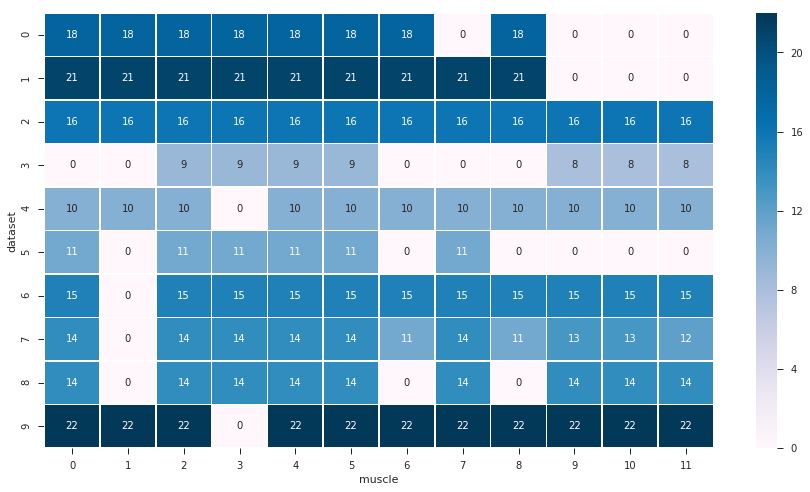

In [6]:
# pivot table: muscle count
table_muscle, _, total = table_count(df, values='test', index='dataset', columns='muscle')

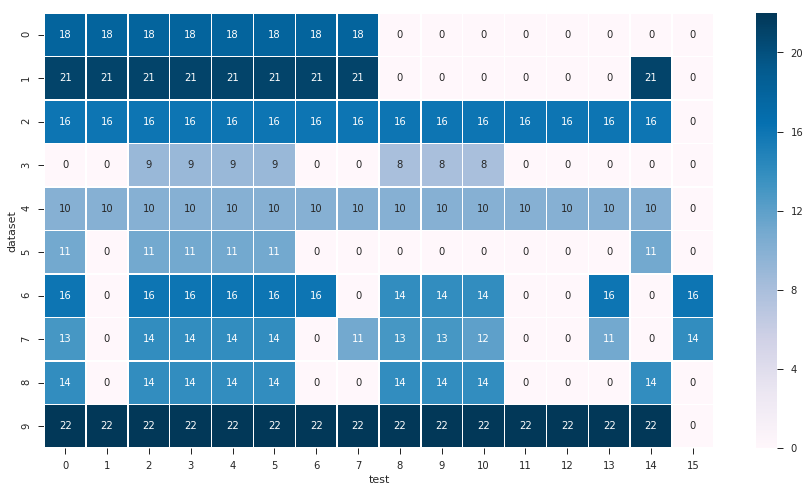

In [7]:
# pivot table: test count
table_test, n, _ = table_count(df, values='muscle', index='dataset', columns='test')

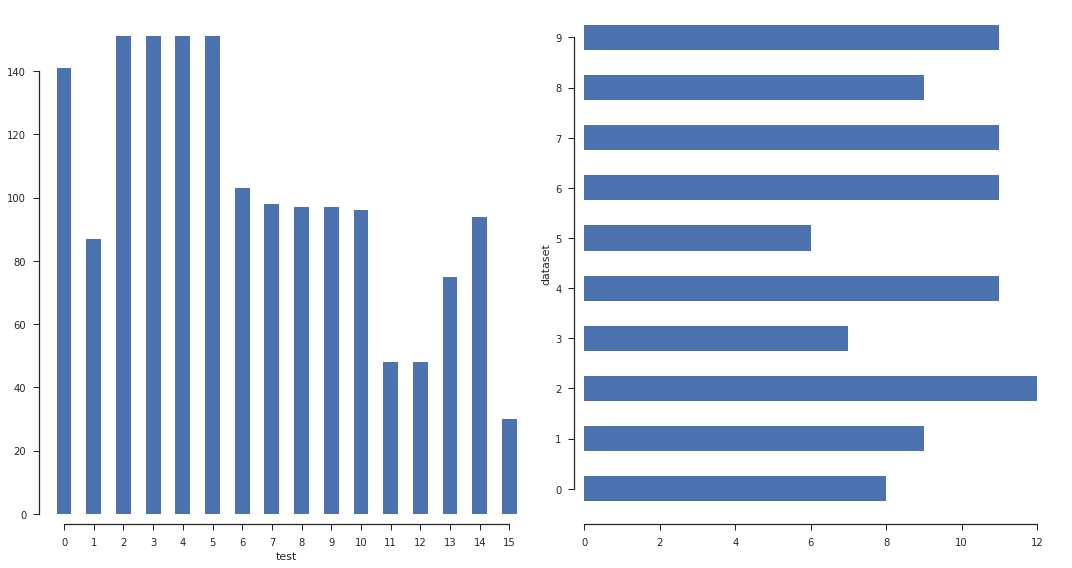

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))
n.plot(kind='bar',ax=ax1)
total.plot(kind='barh',ax=ax2)
sns.despine(offset=10, trim=True)
fig.tight_layout()
plt.show()

- Muscles `10`, `11` and `12`  (_intras_) have only $62$ mvc
- Muscles `1`, `3`, `5` and `6` have $112$ mvc
---
- The following datasets have performed the $15$ tests: `Yoann_2015`, `Sylvain_2015` and `Patrick_2013`
- `Landry_2015_2` have only $6$ tests and `Landry_2012` $8$

# 2. Datasets Homogeneity

In [9]:
maximum = df[df['relative_mvc'] == 100].pivot_table(values='muscle', index='dataset', columns='test',
                                                aggfunc='count', fill_value=0)
maximum = (maximum.div(maximum.sum(axis=1), axis=0)*100).astype(int)

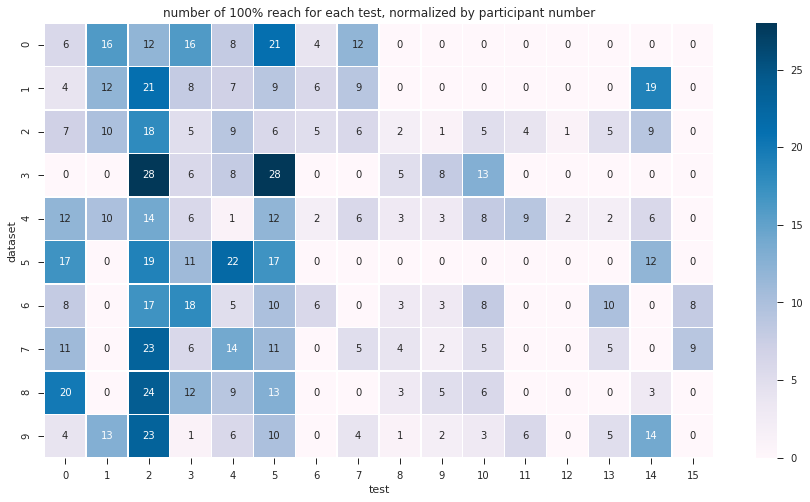

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(maximum, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='PuBu')
ax.set_title('number of 100% reach for each test, normalized by participant number')
plt.show()

# Save dataframe to HDF5 file

In [11]:
store = pd.HDFStore('MVC.h5', 'w')
store['MVC'] = df
store.close()